In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df = pd.read_excel("Data/Crime Calls Data.xlsx",parse_dates=['report_date'])

In [4]:
df.columns

Index(['report_date', 'report_time', 'location', 'category', 'sub_category',
       'x_cord', 'y_cord', 'ps_division', 'ps_station', 'year', 'month',
       'shift', 'case_id', 'contact_no'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421600 entries, 0 to 421599
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   report_date   421600 non-null  datetime64[ns]
 1   report_time   421599 non-null  object        
 2   location      417601 non-null  object        
 3   category      421600 non-null  object        
 4   sub_category  415956 non-null  object        
 5   x_cord        421600 non-null  float64       
 6   y_cord        421600 non-null  float64       
 7   ps_division   421600 non-null  object        
 8   ps_station    421600 non-null  object        
 9   year          421600 non-null  int64         
 10  month         421244 non-null  object        
 11  shift         421599 non-null  object        
 12  case_id       339065 non-null  object        
 13  contact_no    339893 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage:

In [10]:
df.columns

Index(['report_date', 'report_time', 'location', 'category', 'sub_category',
       'x_cord', 'y_cord', 'ps_division', 'ps_station', 'year', 'month',
       'shift', 'case_id', 'contact_no'],
      dtype='object')

In [56]:
filtered_df = df.groupby(['report_date','shift','ps_division']).size().reset_index(name='CrimeCount')
filtered_df

,report_date,shift,ps_division,CrimeCount
0,2019-01-01,A,CANTT,9
1,2019-01-01,A,CITY,2
2,2019-01-01,A,CIVIL LINES,1
3,2019-01-01,A,IQBAL TOWN,5
4,2019-01-01,A,MODEL TOWN,9
...,...,...,...,...
26187,2024-03-08,C,CITY,7
26188,2024-03-08,C,CIVIL LINES,6
26189,2024-03-08,C,IQBAL TOWN,8
26190,2024-03-08,C,MODEL TOWN,7


In [51]:
df['month_year'] = df['report_date'].dt.to_period('M')

# filter the data to include only the last 6 months
last_6_months = df[df['month_year'].isin([pd.Period('2023-08', freq='M'),
                                          pd.Period('2023-09', freq='M'),
                                          pd.Period('2023-10', freq='M'),
                                          pd.Period('2023-11', freq='M'),
                                          pd.Period('2023-12', freq='M'),
                                          pd.Period('2024-01', freq='M')])]

In [53]:
last_6_months.to_csv('last_6_months.csv')

In [57]:
filtered_df.rename(columns={'report_date':'date','ps_division':'District','shift':'DutyShift'},inplace=True)

In [58]:
filtered_df.columns

Index(['date', 'DutyShift', 'District', 'CrimeCount'], dtype='object')

In [59]:
filtered_df['Year'] = filtered_df['date'].dt.year
filtered_df['Month'] = filtered_df['date'].dt.month
filtered_df['Day'] = filtered_df['date'].dt.day
filtered_df['DayOfWeek'] = filtered_df['date'].dt.day_name()

In [55]:
filtered_df.sample(3)

,date,shift,District,CrimeCount,Year,Month,Day,DayOfWeek
6510,2020-01-04,B,IQBAL TOWN,30,2020,1,4,Saturday
2042,2019-04-24,B,SADAR,14,2019,4,24,Wednesday
2159,2019-05-01,A,CIVIL LINES,4,2019,5,1,Wednesday


In [60]:
filtered_df.describe()

,date,CrimeCount,Year,Month,Day
count,26192,26192.00000,26192.000000,26192.000000,26192.000000
mean,2021-03-19 14:16:17.519853056,16.09648,2020.730948,6.329528,15.712584
min,2019-01-01 00:00:00,1.00000,2019.000000,1.000000,1.000000
25%,2020-01-06 00:00:00,8.00000,2020.000000,3.000000,8.000000
50%,2021-01-06 00:00:00,14.00000,2021.000000,6.000000,16.000000
75%,2022-01-06 00:00:00,22.00000,2022.000000,10.000000,23.000000
max,2024-03-08 00:00:00,102.00000,2024.000000,12.000000,31.000000
std,NaN,10.83241,1.472191,3.589067,8.781152


In [61]:
# Calculate the IQR
Q1 = filtered_df['CrimeCount'].quantile(0.25)
Q3 = filtered_df['CrimeCount'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = filtered_df[(filtered_df['CrimeCount'] < lower_bound) | (filtered_df['CrimeCount'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
            date DutyShift    District  CrimeCount  Year  Month  Day  \
6651  2020-01-12         B       CANTT          45  2020      1   12   
6961  2020-01-29         B  MODEL TOWN          44  2020      1   29   
7029  2020-02-02         B       CANTT          48  2020      2    2   
7977  2020-03-26         B       CANTT          53  2020      3   26   
8030  2020-03-29         B       CANTT          66  2020      3   29   
...          ...       ...         ...         ...   ...    ...  ...   
25971 2024-02-25         B       CANTT          46  2024      2   25   
26078 2024-03-02         B       CANTT          44  2024      3    2   
26119 2024-03-04         B       SADAR          44  2024      3    4   
26154 2024-03-06         B  MODEL TOWN          48  2024      3    6   
26172 2024-03-07         B  MODEL TOWN          46  2024      3    7   

       DayOfWeek  
6651      Sunday  
6961   Wednesday  
7029      Sunday  
7977    Thursday  
8030      Sunday  
...        

In [62]:
outliers[:20]

,date,DutyShift,District,CrimeCount,Year,Month,Day,DayOfWeek
6651,2020-01-12,B,CANTT,45,2020,1,12,Sunday
6961,2020-01-29,B,MODEL TOWN,44,2020,1,29,Wednesday
7029,2020-02-02,B,CANTT,48,2020,2,2,Sunday
7977,2020-03-26,B,CANTT,53,2020,3,26,Thursday
8030,2020-03-29,B,CANTT,66,2020,3,29,Sunday
8048,2020-03-30,B,CANTT,49,2020,3,30,Monday
8066,2020-03-31,B,CANTT,47,2020,3,31,Tuesday
8100,2020-04-02,B,CANTT,50,2020,4,2,Thursday
8118,2020-04-03,B,CANTT,55,2020,4,3,Friday
8154,2020-04-05,B,CANTT,46,2020,4,5,Sunday


In [63]:
mean_value = filtered_df['CrimeCount'].mean()
filtered_df.loc[(filtered_df['CrimeCount'] < lower_bound) | (filtered_df['CrimeCount'] > upper_bound), 'CrimeCount'] = mean_value

filtered_df.head()

C:\Users\bilal.saeed\AppData\Local\Temp\ipykernel_1144\1687826749.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.096479841172876' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  filtered_df.loc[(filtered_df['CrimeCount'] < lower_bound) | (filtered_df['CrimeCount'] > upper_bound), 'CrimeCount'] = mean_value


,date,DutyShift,District,CrimeCount,Year,Month,Day,DayOfWeek
0,2019-01-01,A,CANTT,9.0,2019,1,1,Tuesday
1,2019-01-01,A,CITY,2.0,2019,1,1,Tuesday
2,2019-01-01,A,CIVIL LINES,1.0,2019,1,1,Tuesday
3,2019-01-01,A,IQBAL TOWN,5.0,2019,1,1,Tuesday
4,2019-01-01,A,MODEL TOWN,9.0,2019,1,1,Tuesday


In [64]:
filtered_data = filtered_df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'CrimeCount' column using the copied DataFrame
filtered_data.loc[:, 'CrimeCount_Normalized'] = scaler.fit_transform(filtered_data[['CrimeCount']])

print(filtered_data)

            date DutyShift     District  CrimeCount  Year  Month  Day  \
0     2019-01-01         A        CANTT         9.0  2019      1    1   
1     2019-01-01         A         CITY         2.0  2019      1    1   
2     2019-01-01         A  CIVIL LINES         1.0  2019      1    1   
3     2019-01-01         A   IQBAL TOWN         5.0  2019      1    1   
4     2019-01-01         A   MODEL TOWN         9.0  2019      1    1   
...          ...       ...          ...         ...   ...    ...  ...   
26187 2024-03-08         C         CITY         7.0  2024      3    8   
26188 2024-03-08         C  CIVIL LINES         6.0  2024      3    8   
26189 2024-03-08         C   IQBAL TOWN         8.0  2024      3    8   
26190 2024-03-08         C   MODEL TOWN         7.0  2024      3    8   
26191 2024-03-08         C        SADAR         5.0  2024      3    8   

      DayOfWeek  CrimeCount_Normalized  
0       Tuesday               0.190476  
1       Tuesday               0.023810  


In [65]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26192 entries, 0 to 26191
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   26192 non-null  datetime64[ns]
 1   DutyShift              26192 non-null  object        
 2   District               26192 non-null  object        
 3   CrimeCount             26192 non-null  float64       
 4   Year                   26192 non-null  int32         
 5   Month                  26192 non-null  int32         
 6   Day                    26192 non-null  int32         
 7   DayOfWeek              26192 non-null  object        
 8   CrimeCount_Normalized  26192 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 1.5+ MB


In [80]:
# Drop the 'Year', 'Month', and 'Day' columns
selectedFeatured = filtered_data.drop(['CrimeCount','Year','Day','date'], axis=1)

In [81]:
print(selectedFeatured.head())

  DutyShift     District  Month DayOfWeek  CrimeCount_Normalized
0         A        CANTT      1   Tuesday               0.190476
1         A         CITY      1   Tuesday               0.023810
2         A  CIVIL LINES      1   Tuesday               0.000000
3         A   IQBAL TOWN      1   Tuesday               0.095238
4         A   MODEL TOWN      1   Tuesday               0.190476


In [82]:
encoded_df = pd.get_dummies(selectedFeatured, columns=['District', 'DutyShift','Month','DayOfWeek'])

print(encoded_df)

       CrimeCount_Normalized  District_CANTT  District_CITY  \
0                   0.190476            True          False   
1                   0.023810           False           True   
2                   0.000000           False          False   
3                   0.095238           False          False   
4                   0.190476           False          False   
...                      ...             ...            ...   
26187               0.142857           False           True   
26188               0.119048           False          False   
26189               0.166667           False          False   
26190               0.142857           False          False   
26191               0.095238           False          False   

       District_CIVIL LINES  District_IQBAL TOWN  District_MODEL TOWN  \
0                     False                False                False   
1                     False                False                False   
2                      T

In [68]:
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26192 entries, 0 to 26191
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   26192 non-null  datetime64[ns]
 1   CrimeCount_Normalized  26192 non-null  float64       
 2   District_CANTT         26192 non-null  bool          
 3   District_CITY          26192 non-null  bool          
 4   District_CIVIL LINES   26192 non-null  bool          
 5   District_IQBAL TOWN    26192 non-null  bool          
 6   District_MODEL TOWN    26192 non-null  bool          
 7   District_SADAR         26192 non-null  bool          
 8   DutyShift_A            26192 non-null  bool          
 9   DutyShift_B            26192 non-null  bool          
 10  DutyShift_C            26192 non-null  bool          
 11  Month_1                26192 non-null  bool          
 12  Month_2                26192 non-null  bool          
 13  M

In [83]:
y = encoded_df['CrimeCount_Normalized']
X = encoded_df.drop('CrimeCount_Normalized', axis=1)

In [84]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train

,District_CANTT,District_CITY,District_CIVIL LINES,District_IQBAL TOWN,District_MODEL TOWN,District_SADAR,DutyShift_A,DutyShift_B,DutyShift_C,Month_1,...,Month_10,Month_11,Month_12,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
19134,False,False,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
23588,False,False,False,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
1097,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4291,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
17156,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5390,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
860,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
15795,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [77]:
y_train

19134    0.214286
23588    0.428571
1097     0.214286
4291     0.023810
17156    0.333333
           ...   
21575    0.452381
5390     0.261905
860      0.214286
15795    0.333333
23654    0.809524
Name: CrimeCount_Normalized, Length: 20953, dtype: float64

In [73]:
type(y_test)

pandas.core.series.Series

In [86]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [87]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
y_pred_lr = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.034155733477569714


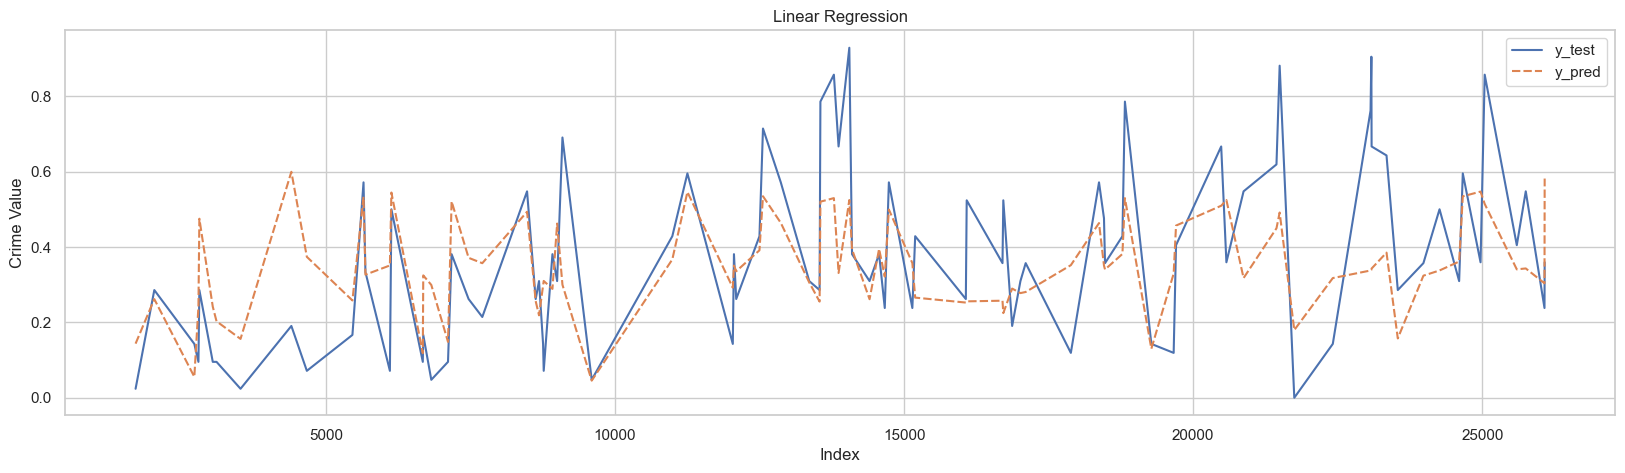

In [88]:
line_chart_LR_df = pd.DataFrame({'y_test': y_test[:90], 'y_pred': y_pred_lr[:90]})
sns.set(style='whitegrid')  # Set the style of the plot

# Create the line plot
plt.figure(figsize=(20, 5))  # Set the figure size (width, height)
sns.lineplot(data=line_chart_LR_df)

# Add title and labels
plt.title('Linear Regression')
plt.xlabel('Index')
plt.ylabel('Crime Value')

# Show the plot
plt.show()

In [89]:
from sklearn.svm import SVR# Initialize SVR model
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_SVR = svr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_SVR)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.035872037464454984


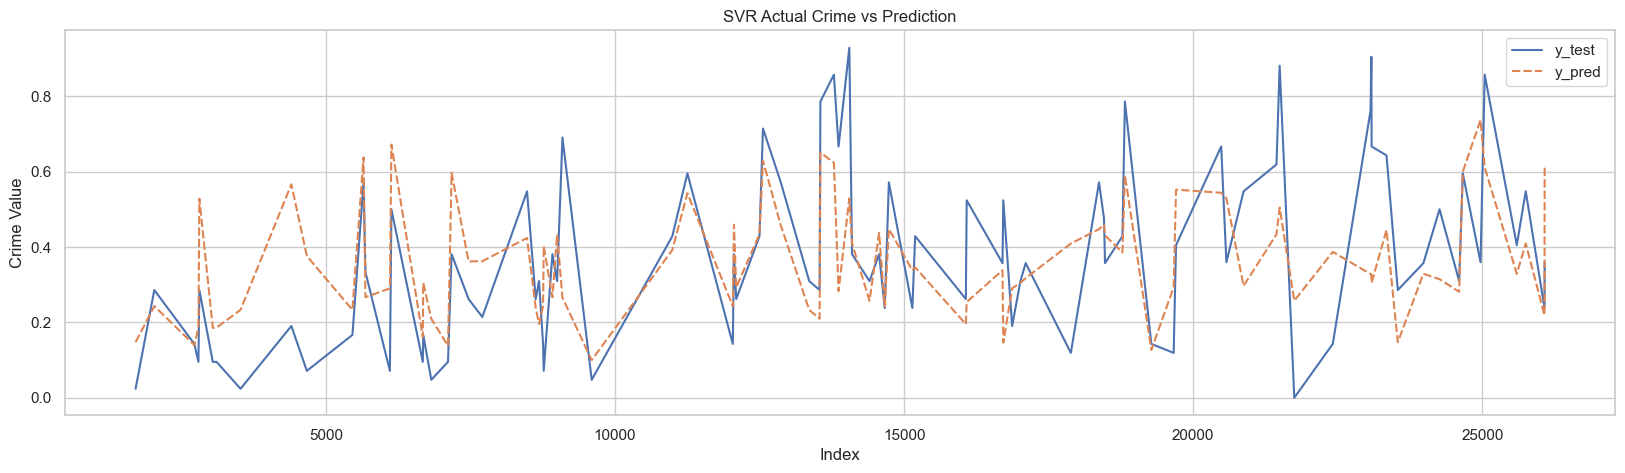

In [90]:
line_chart_svr_df = pd.DataFrame({'y_test': y_test[:90], 'y_pred': y_pred_SVR[:90]})
sns.set_theme(style='whitegrid')  # Set the style of the plot

# Create the line plot
plt.figure(figsize=(20, 5))  # Set the figure size (width, height)
sns.lineplot(data=line_chart_svr_df)

# Add title and labels
plt.title('SVR Actual Crime vs Prediction')
plt.xlabel('Index')
plt.ylabel('Crime Value')

# Show the plot
plt.show()

In [91]:
from sklearn.neural_network import MLPRegressor
# Initialize MLP Regressor model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_MLP = mlp_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_MLP)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.034138494280004685


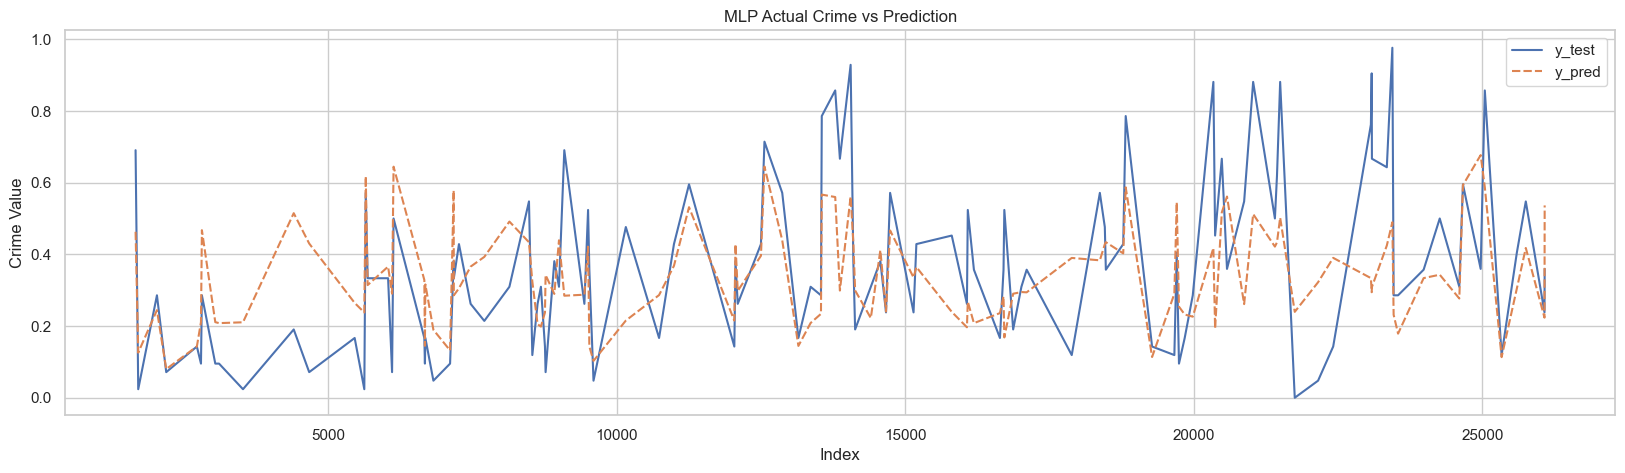

In [92]:
line_chart_MLP_df = pd.DataFrame({'y_test': y_test[:120], 'y_pred': y_pred_MLP[:120]})
sns.set(style='whitegrid')  # Set the style of the plot

# Create the line plot
plt.figure(figsize=(20, 5))  # Set the figure size (width, height)
sns.lineplot(data=line_chart_MLP_df)

# Add title and labels
plt.title('MLP Actual Crime vs Prediction')
plt.xlabel('Index')
plt.ylabel('Crime Value')

# Show the plot
plt.show()

In [93]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.03605654029517227


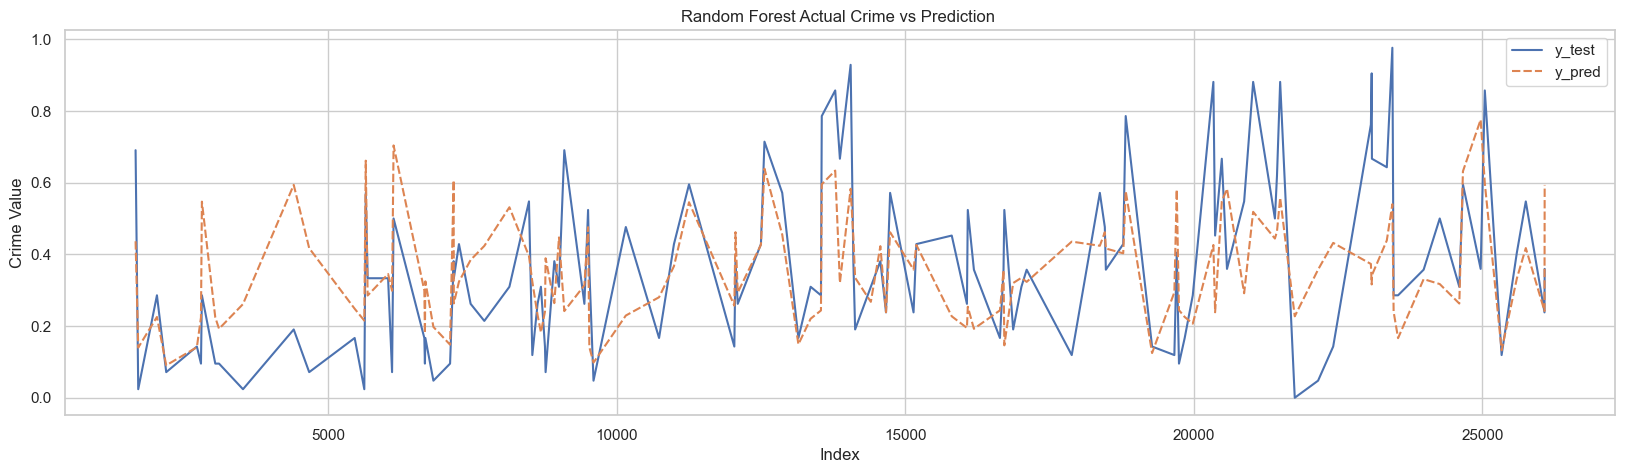

In [94]:
line_chart_rf_df = pd.DataFrame({'y_test': y_test[:120], 'y_pred': y_pred_rf[:120]})
sns.set(style='whitegrid')  # Set the style of the plot

# Create the line plot
plt.figure(figsize=(20, 5))  # Set the figure size (width, height)
sns.lineplot(data=line_chart_rf_df)

# Add title and labels
plt.title('Random Forest Actual Crime vs Prediction ')
plt.xlabel('Index')
plt.ylabel('Crime Value')

# Show the plot
plt.show()

In [96]:
df['DayOfWeek'] = filtered_df.apply(lambda row: datetime(row['Year'], row['Month'], row['Day']).strftime('%A'), axis=1)
print(df.head())

  report_date report_time                                           location  \
0  2019-01-01    15:19:45                                        garhi shahu   
1  2019-01-01    14:49:03  36-G Bilal Center Nicholson Road, Lahore, Laho...   
2  2019-01-01    21:14:54                           street 16 Muhammad nagar   
3  2019-01-01    05:39:37                                   dhobi ghat chwok   
4  2019-01-01    21:27:07                garhi shahu, gali no 3, ahbaab park   

           category      sub_category     x_cord     y_cord  ps_division  \
0             THEFT               NaN  74.344415  31.566790  CIVIL LINES   
1  MOTORCYCLE THEFT  Motorcycle Theft  74.336912  31.562108  CIVIL LINES   
2             THEFT      Theft Caught  74.330417  31.566641  CIVIL LINES   
3           ROBBERY      ROAD ROBBERY  74.373139  31.618405  CIVIL LINES   
4  MOTORCYCLE THEFT  Motorcycle Theft  74.346524  31.564757  CIVIL LINES   

             ps_station  year    month shift case_id contact_n

In [98]:
filtered_df.to_excel("Lahore15v2.xlsx")

In [97]:
df.to_excel('Lahore15v2.xlsx', index=False)

In [99]:
filtered_df.columns

Index(['date', 'DutyShift', 'District', 'CrimeCount', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')

In [105]:
filtered_df.columns

Index(['DutyShift', 'District', 'CrimeCount', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')

In [106]:
Attock_df = filtered_df[filtered_df['District'] == 'SADAR']

In [107]:
Attock_df.head()

,DutyShift,District,CrimeCount,Year,Month,Day,DayOfWeek
5,A,SADAR,2.0,2019,1,1,Tuesday
11,B,SADAR,16.0,2019,1,1,Tuesday
17,C,SADAR,6.0,2019,1,1,Tuesday
23,A,SADAR,9.0,2019,1,2,Wednesday
29,B,SADAR,16.0,2019,1,2,Wednesday


In [108]:
Attock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4382 entries, 5 to 26191
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DutyShift   4382 non-null   object 
 1   District    4382 non-null   object 
 2   CrimeCount  4382 non-null   float64
 3   Year        4382 non-null   int32  
 4   Month       4382 non-null   int32  
 5   Day         4382 non-null   int32  
 6   DayOfWeek   4382 non-null   object 
dtypes: float64(1), int32(3), object(3)
memory usage: 222.5+ KB


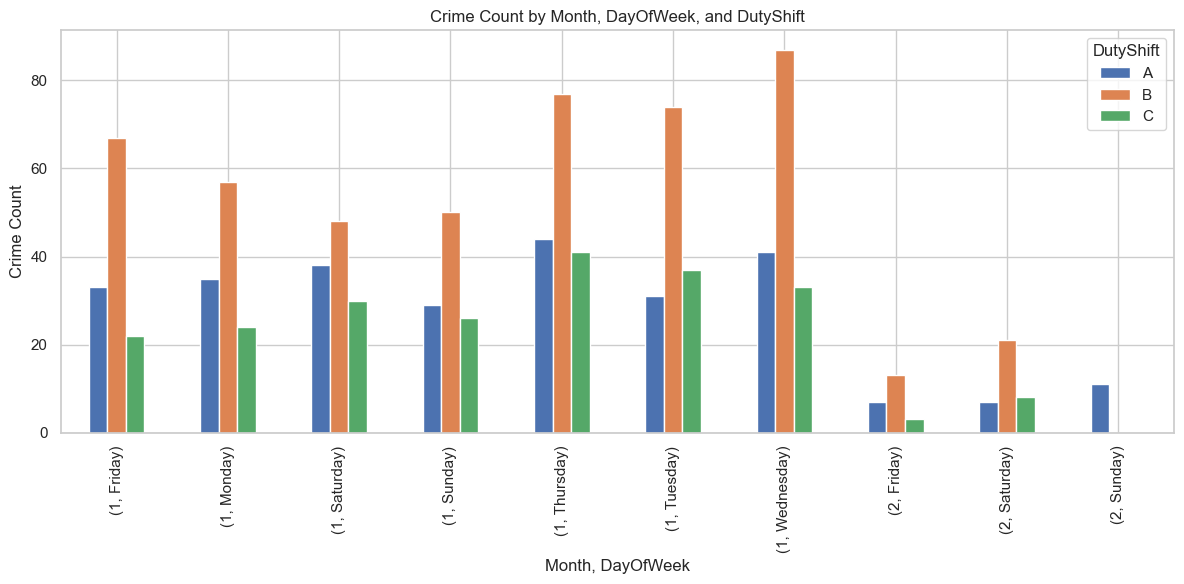

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your DataFrame)
Attock_df= Attock_df[:100]
# Group the data by 'Month', 'DayOfWeek', and 'DutyShift' and calculate the sum of 'CrimeCount'
grouped_df = Attock_df.groupby(['Month', 'DayOfWeek', 'DutyShift'])['CrimeCount'].sum().reset_index()

# Create a multi-index DataFrame to pivot the data
pivot_df = grouped_df.pivot_table(index=['Month', 'DayOfWeek'], columns='DutyShift', values='CrimeCount', fill_value=0)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('Month, DayOfWeek')
plt.ylabel('Crime Count')
plt.title('Crime Count by Month, DayOfWeek, and DutyShift')

# Show the plot
plt.tight_layout()
plt.show()

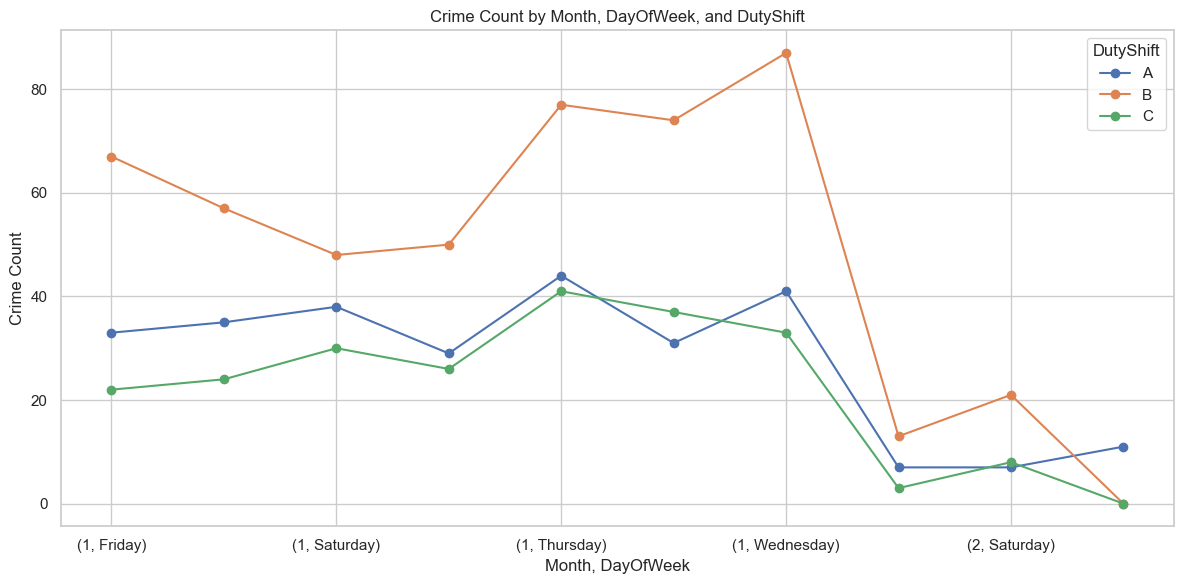

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Group the data by 'Month', 'DayOfWeek', and 'DutyShift' and calculate the sum of 'CrimeCount'
grouped_df = Attock_df.groupby(['Month', 'DayOfWeek', 'DutyShift'])['CrimeCount'].sum().reset_index()

# Create a multi-index DataFrame to pivot the data
pivot_df = grouped_df.pivot_table(index=['Month', 'DayOfWeek'], columns='DutyShift', values='CrimeCount', fill_value=0)

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='line', ax=ax, marker='o')  # Use 'line' instead of 'bar' for a line chart

# Set labels and title
plt.xlabel('Month, DayOfWeek')
plt.ylabel('Crime Count')
plt.title('Crime Count by Month, DayOfWeek, and DutyShift')

# Show the plot
plt.tight_layout()
plt.show()

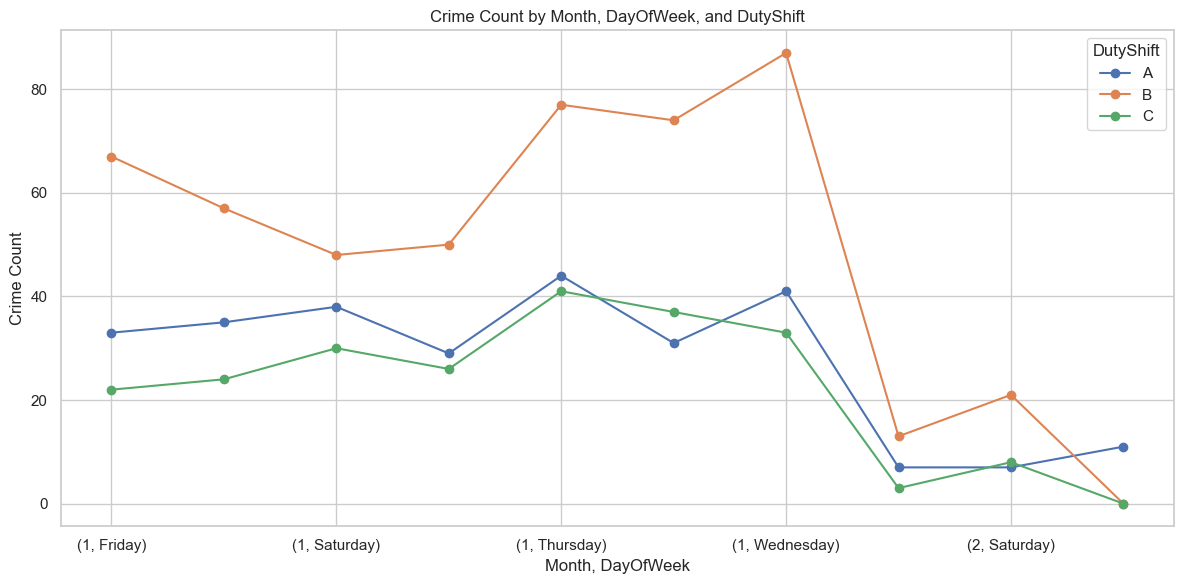

In [111]:
import pandas as pd
import matplotlib.pyplot as plt



# Sort the data by 'Month', 'DayOfWeek', and 'DutyShift'
Attock_df.sort_values(by=['Month', 'DayOfWeek', 'DutyShift'], inplace=True)

# Group the data by 'Month', 'DayOfWeek', and 'DutyShift' and calculate the sum of 'CrimeCount'
grouped_df = Attock_df.groupby(['Month', 'DayOfWeek', 'DutyShift'])['CrimeCount'].sum().reset_index()

# Create a multi-index DataFrame to pivot the data
pivot_df = grouped_df.pivot_table(index=['Month', 'DayOfWeek'], columns='DutyShift', values='CrimeCount', fill_value=0)

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='line', ax=ax, marker='o')  # Use 'line' instead of 'bar' for a line chart

# Set labels and title
plt.xlabel('Month, DayOfWeek')
plt.ylabel('Crime Count')
plt.title('Crime Count by Month, DayOfWeek, and DutyShift')

# Show the plot
plt.tight_layout()
plt.show()

In [113]:
Attock_df_200=Attock_df[:1000]

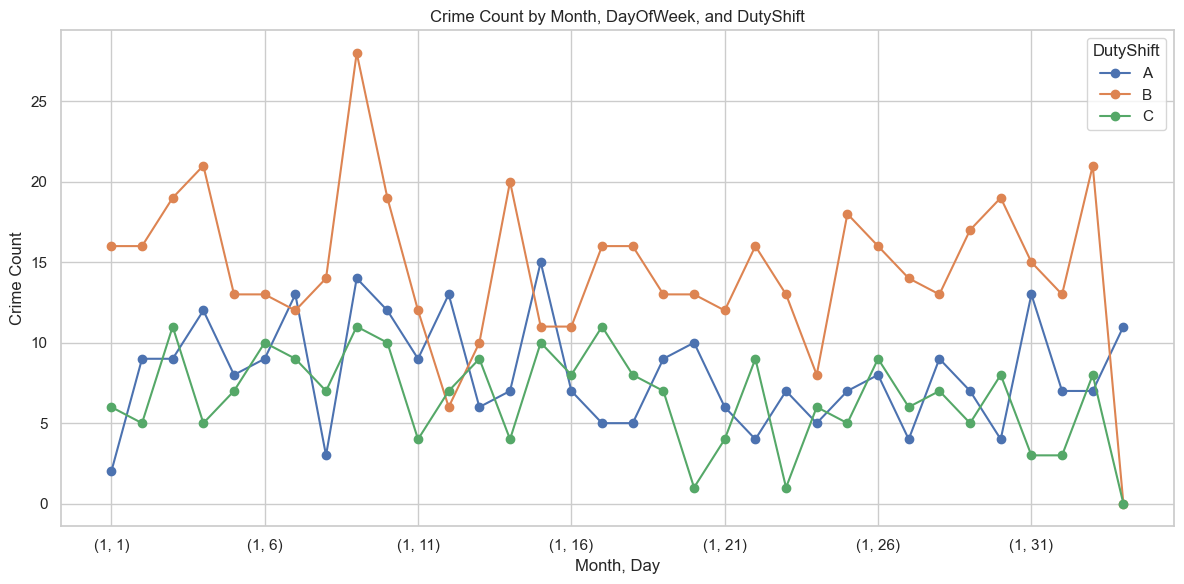

In [114]:
import pandas as pd
import matplotlib.pyplot as plt



# Sort the data by 'Month', 'DayOfWeek', and 'DutyShift'
Attock_df_200.sort_values(by=['Month', 'Day', 'DutyShift'], inplace=True)

 

# Create a multi-index DataFrame to pivot the data
pivot_df = Attock_df_200.pivot_table(index=['Month', 'Day'], columns='DutyShift', values='CrimeCount', fill_value=0)

# Plot the data as a line chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='line', ax=ax, marker='o')  # Use 'line' instead of 'bar' for a line chart

# Set labels and title
plt.xlabel('Month, Day')
plt.ylabel('Crime Count')
plt.title('Crime Count by Month, DayOfWeek, and DutyShift')

# Show the plot
plt.tight_layout()
plt.show()